# Computer Vision 

## Convert to gray scale 

In [80]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

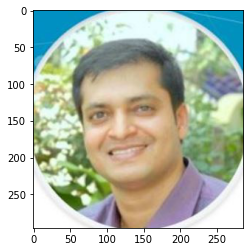

In [3]:
image=mpimg.imread("Capture.JPG")
plt.imshow(image)

In [193]:
image.shape

(296, 286, 3)

In [194]:
gray_image=cv2.cvtColor(image,cv2.COLOR_RGB2GRAY)

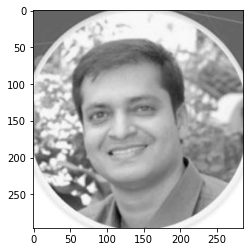

In [195]:
plt.imshow(gray_image,cmap='gray')

## Find out pixel of any point in an image

In [38]:
x=190
y=350
print(gray_image[y,x])

106


## Create smiley from raw matrix

In [29]:
tiny_image = np.array([[0, 0, 0, 0, 0],
                      [0, 255, 0, 255, 0],
                      [0, 0, 0, 0, 0],
                      [0, 255, 255, 255, 0],
                      [0, 0, 0, 0, 0]])

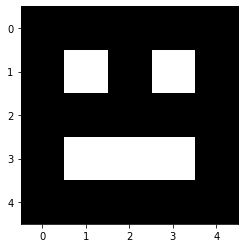

In [32]:
plt.imshow(tiny_image,cmap='gray')

## Fetch RGB pictures

In [39]:
road_image=mpimg.imread("wa_state_highway.jpg")

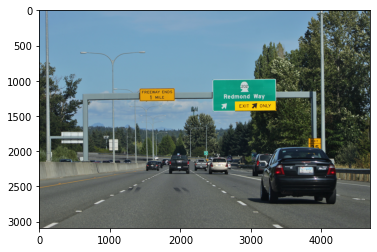

In [40]:
plt.imshow(road_image)

In [44]:
r=road_image[:,:,0]
g=road_image[:,:,1]
b=road_image[:,:,2]

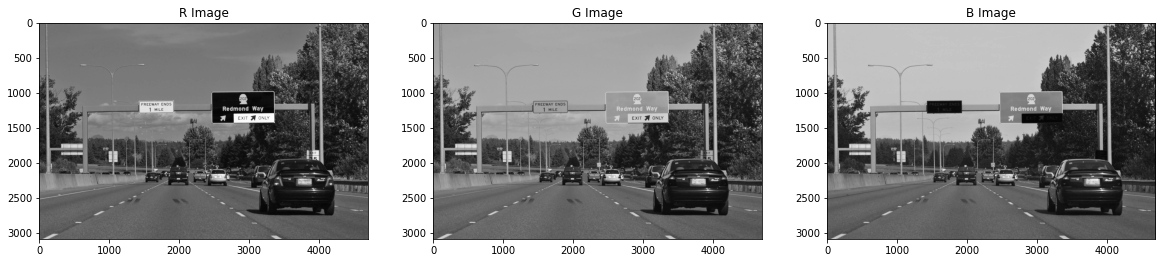

In [62]:
f,(ax1,ax2,ax3)=plt.subplots(1,3,figsize=(20,40))
ax1.set_title("R Image")
ax1.imshow(r,cmap='gray')
ax2.set_title("G Image")
ax2.imshow(g,cmap="gray")
ax3.set_title("B Image")
ax3.imshow(b,cmap="gray")

## Changing background 

In [97]:
pizza=cv2.imread("pizza_bluescreen.jpg")

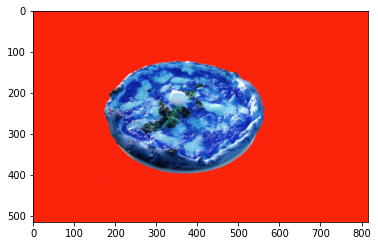

In [98]:
plt.imshow(pizza) ## cv2 reads file as BGR so need to convert to RGB

In [99]:
pizza=cv2.cvtColor(pizza,cv2.COLOR_BGR2RGB)

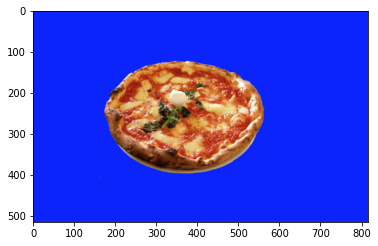

In [100]:
plt.imshow(pizza)

In [101]:
pizza.shape

(514, 816, 3)

In [102]:
lower_blue=np.array([0,0,220])
higher_blue=np.array([50,50,255])

In [103]:
mask=cv2.inRange(pizza,lower_blue,higher_blue)

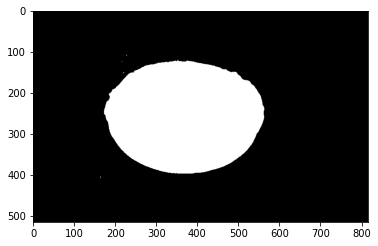

In [122]:
plt.imshow(mask==0,cmap="gray")

In [105]:
pizza[mask!=0]=[0,0,0]

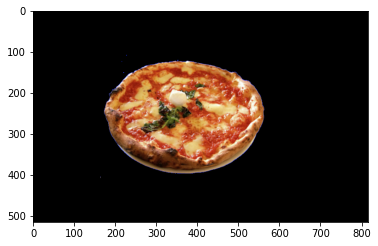

In [106]:
plt.imshow(pizza,cmap="gray")

### Use some other background

In [107]:
bck_image=cv2.imread("space_background.jpg")

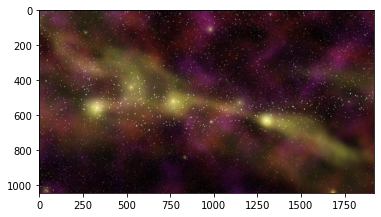

In [108]:
plt.imshow(bck_image)

In [109]:
bck_image=bck_image[:514,:816]

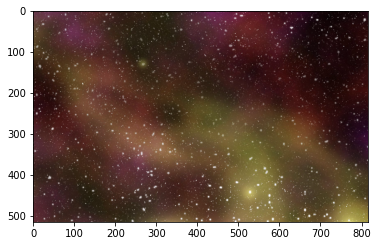

In [110]:
plt.imshow(bck_image)

In [114]:
bck_image[mask==0]=[0,0,0]

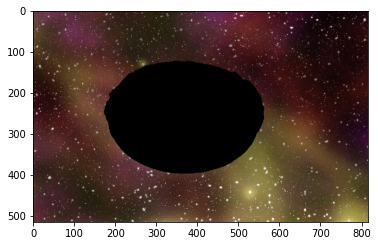

In [115]:
plt.imshow(bck_image)

In [117]:
final_image=pizza+bck_image

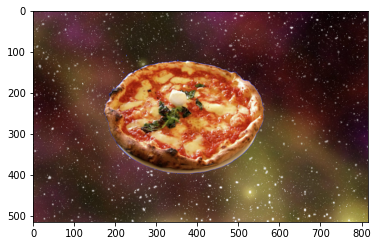

In [118]:
plt.imshow(final_image)

## Using HSV instead of RGB to pick pink balloons

In [123]:
balloons=mpimg.imread("water_balloons.jpg")

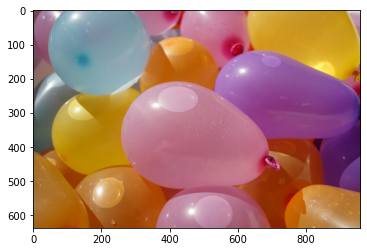

In [127]:
plt.imshow(balloons)

In [128]:
hsv=cv2.cvtColor(balloons,cv2.COLOR_RGB2HSV)

In [129]:
h=hsv[:,:,0]
s=hsv[:,:,1]
v=hsv[:,:,2]

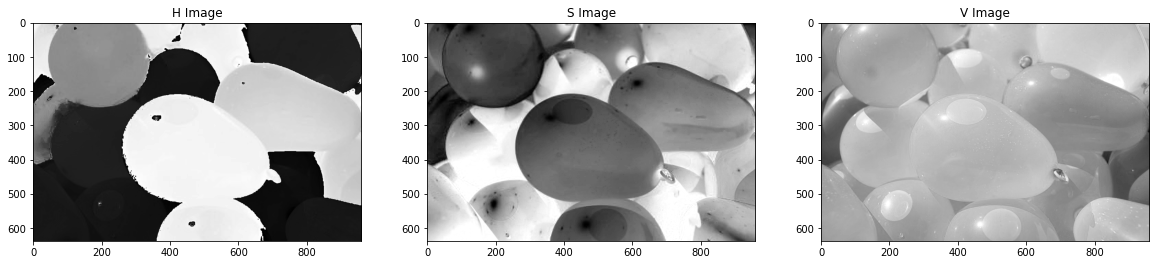

In [136]:
f,(ax1,ax2,ax3)=plt.subplots(1,3,figsize=(20,30))
ax1.set_title("H Image")
ax1.imshow(h,cmap='gray')
ax2.set_title("S Image")
ax2.imshow(s,cmap='gray')
ax3.set_title("V Image")
ax3.imshow(v,cmap='gray')

In [151]:
hsv_copy=np.copy(hsv)

In [152]:
lower_value=np.array([160,0,0])
upper_value=np.array([180,255,255])

In [153]:
mask=cv2.inRange(hsv_copy,lower_value,upper_value)

In [154]:
hsv_copy_2=np.copy(hsv_copy)

In [155]:
hsv_copy_2[mask==0]=[0,0,0]

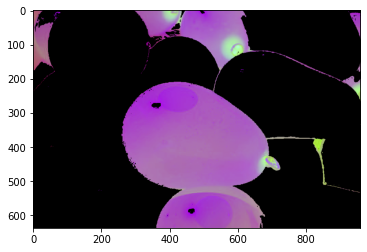

In [156]:
plt.imshow(hsv_copy_2)

## Analysis of FFT over images

In [26]:
def ft_image(norm_image):
    '''This function takes in a normalized, grayscale image
       and returns a frequency spectrum transform of that image. '''
    f = np.fft.fft2(norm_image)
    fshift = np.fft.fftshift(f)
    frequency_tx = 20*np.log(np.abs(fshift))
    
    return frequency_tx

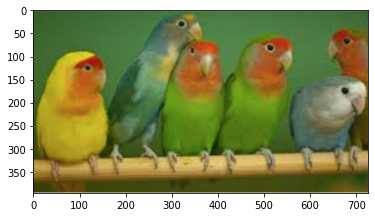

In [27]:
birds=mpimg.imread("birds.jpg")
plt.imshow(birds)

In [28]:
birds_gray=cv2.cvtColor(birds,cv2.COLOR_RGB2GRAY)

In [29]:
birds_scaled=birds_gray/255.0

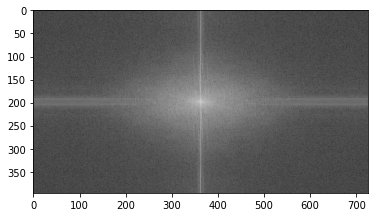

In [30]:
plt.imshow(ft_image(birds_scaled),cmap="gray")

## Kernels/Filters

### Averaging Filter (Make the picture blur)

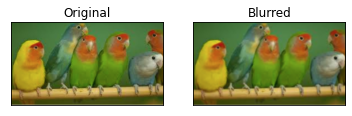

In [180]:
blur = cv2.blur(birds,(5,5))

plt.subplot(121),plt.imshow(birds),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(blur),plt.title('Blurred')
plt.xticks([]), plt.yticks([])
plt.show()

### Gaussian Filter

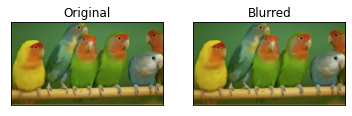

In [181]:
blur = cv2.GaussianBlur(birds,(5,5),0)

plt.subplot(121),plt.imshow(birds),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(blur),plt.title('Blurred')
plt.xticks([]), plt.yticks([])
plt.show()

### Median Filter (Applied when original image has 50% noise)

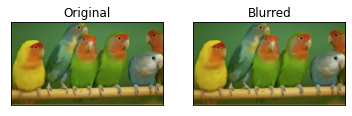

In [182]:
median = cv2.medianBlur(birds,5)

plt.subplot(121),plt.imshow(birds),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(blur),plt.title('Blurred')
plt.xticks([]), plt.yticks([])
plt.show()

### Bilateral Filter (Preserves edges)

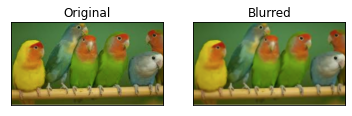

In [183]:
blur = cv2.bilateralFilter(birds,9,75,75)

plt.subplot(121),plt.imshow(birds),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(blur),plt.title('Blurred')
plt.xticks([]), plt.yticks([])
plt.show()

### Sobel filter/Edge detection custom filter

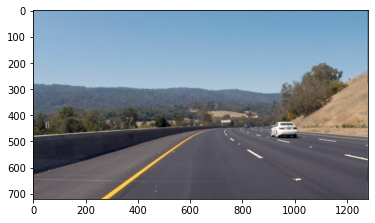

In [4]:
curved_lane=mpimg.imread("curved_lane.jpg")
plt.imshow(curved_lane)

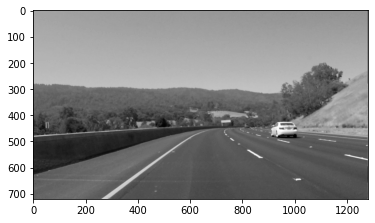

In [5]:
curved_lane_grayscale=cv2.cvtColor(curved_lane,cv2.COLOR_RGB2GRAY)
plt.imshow(curved_lane_grayscale,cmap="gray")

In [6]:
# 3x3 array for edge detection
sobel_y = np.array([[ -1, -2, -1], 
                   [ 0, 0, 0], 
                   [ 1, 2, 1]])

## TODO: Create and apply a Sobel x operator
sobel_x = np.array([[ -1, 0, 1], 
                   [ -2, 0, 2], 
                   [ -1, 0, 1]])

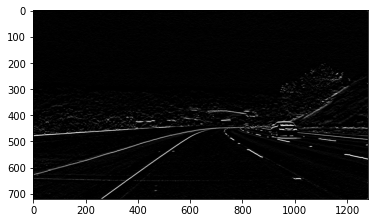

In [7]:
filtered_image = cv2.filter2D(curved_lane_grayscale, -1, sobel_y)

plt.imshow(filtered_image, cmap='gray')

In [11]:
ret_val,binary_image=cv2.threshold(filtered_image,50,255,cv2.THRESH_BINARY)

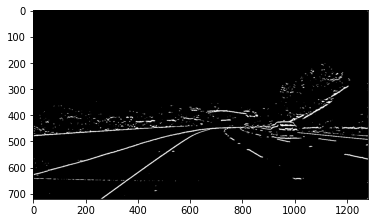

In [12]:
plt.imshow(binary_image,cmap="gray")

## Remove noise by passing through LPF(Gaussian filter) and detecting edges using HPF(Sobel filter)

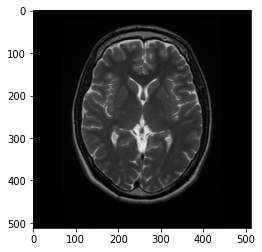

In [16]:
brain=mpimg.imread("brain_MR.jpg")
plt.imshow(brain)

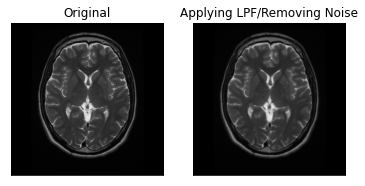

In [18]:
blur = cv2.GaussianBlur(brain,(5,5),0)

plt.subplot(121),plt.imshow(brain),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(blur),plt.title('Applying LPF/Removing Noise')
plt.xticks([]), plt.yticks([])
plt.show()

In [19]:
# 3x3 array for edge detection
sobel_y = np.array([[ -1, -2, -1], 
                   [ 0, 0, 0], 
                   [ 1, 2, 1]])

## TODO: Create and apply a Sobel x operator
sobel_x = np.array([[ -1, 0, 1], 
                   [ -2, 0, 2], 
                   [ -1, 0, 1]])

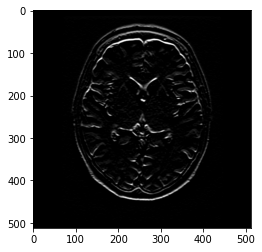

In [20]:
filtered_image = cv2.filter2D(blur, -1, sobel_y)

plt.imshow(filtered_image, cmap='gray')

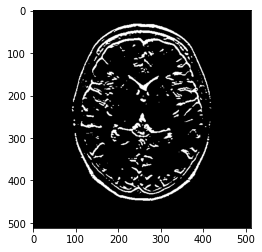

In [25]:
plt.imshow(binary_image)

## Canny Edge Detector (Gaussian LPF+Sobel HPF+Hysterisis(threshold))

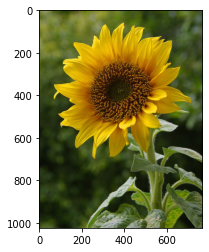

In [44]:
sunflower=mpimg.imread("sunflower.jpg")
plt.imshow(sunflower)

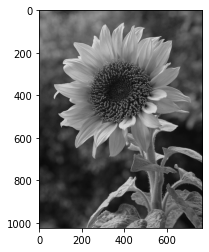

In [51]:
sunflower_gray=cv2.cvtColor(sunflower,cv2.COLOR_RGB2GRAY) 
plt.imshow(sunflower_gray,cmap="gray")

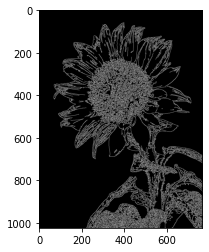

In [52]:
sunflower_edge=cv2.Canny(sunflower_gray,30,100) # for best result keep lower:upper ratio as 1:3
plt.imshow(sunflower_edge,cmap="gray")

### Canny edge detector applied on brain image

In [53]:
brain_gray=cv2.cvtColor(brain,cv2.COLOR_RGB2GRAY)

In [54]:
brain_edge=cv2.Canny(brain_gray,30,100)

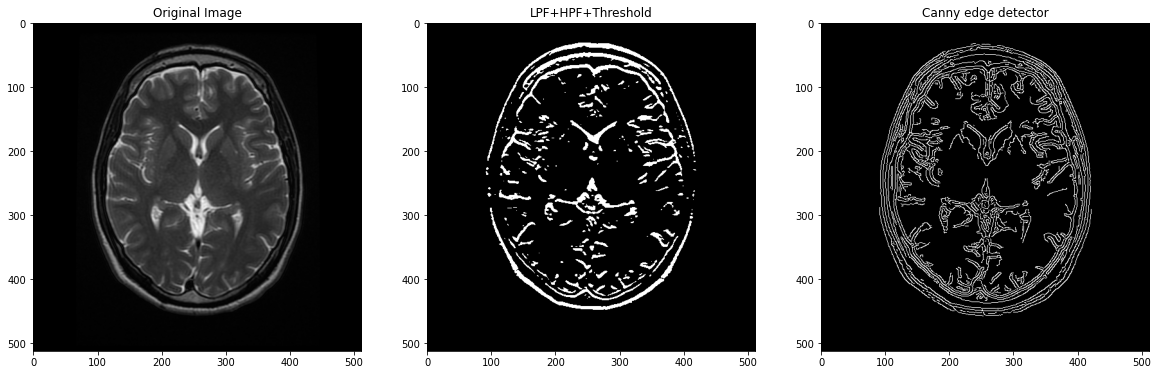

In [58]:
f,(ax1,ax2,ax3)=plt.subplots(1,3,figsize=(20,40))
ax1.set_title("Original Image")
ax1.imshow(brain)
ax2.set_title("LPF+HPF+Threshold")
ax2.imshow(binary_image)
ax3.set_title("Canny edge detector")
ax3.imshow(brain_edge,cmap="gray")

## Hough lines algorithm for drawing lines

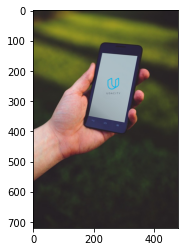

In [71]:
image = cv2.imread('phone.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)

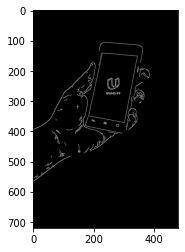

In [72]:
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
low_threshold = 50
high_threshold = 100
edges = cv2.Canny(gray, low_threshold, high_threshold)
plt.imshow(edges, cmap='gray')

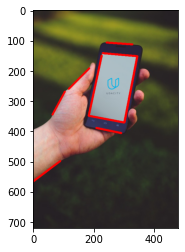

In [76]:
rho = 1
theta = np.pi/180
threshold = 60
min_line_length = 50
max_line_gap = 5

line_image = np.copy(image) #creating an image copy to draw lines on

lines = cv2.HoughLinesP(edges, rho, theta, threshold, np.array([]),
                        min_line_length, max_line_gap)

for line in lines:
    for x1,y1,x2,y2 in line:
        cv2.line(line_image,(x1,y1),(x2,y2),(255,0,0),5)
        
plt.imshow(line_image)

## Hough circle algorithm fo drawing circle

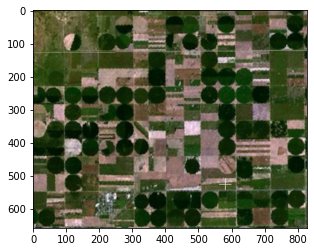

In [77]:
image = cv2.imread('round_farms.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)

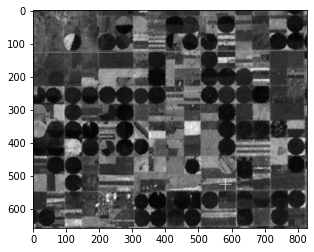

In [78]:
gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
gray_blur = cv2.GaussianBlur(gray, (3, 3), 0)
plt.imshow(gray_blur, cmap='gray')

Circles shape:  (1, 171, 3)


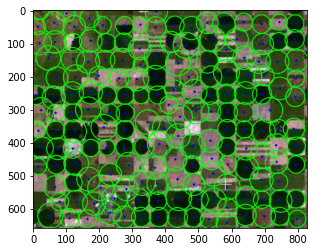

In [79]:
circles_im = np.copy(image)
circles = cv2.HoughCircles(gray_blur, cv2.HOUGH_GRADIENT, 1, 
                           minDist=45,
                           param1=70,
                           param2=11,
                           minRadius=20,
                           maxRadius=40)

circles = np.uint16(np.around(circles))

for i in circles[0,:]:
    # draw the outer circle
    cv2.circle(circles_im,(i[0],i[1]),i[2],(0,255,0),2)
    # draw the center of the circle
    cv2.circle(circles_im,(i[0],i[1]),2,(0,0,255),3)
    
plt.imshow(circles_im)

print('Circles shape: ', circles.shape)
    

## Harris corner detector

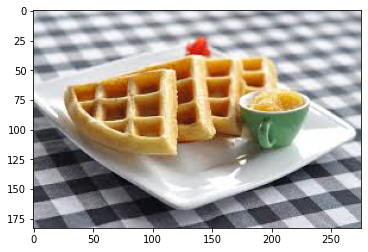

In [119]:
image=mpimg.imread("waffle.jpg")
image_copy=np.copy(image)
plt.imshow(image_copy)

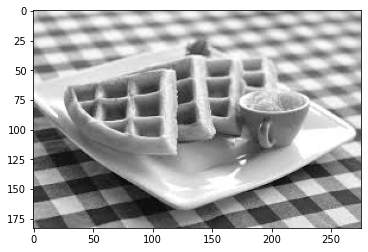

In [121]:
gray=cv2.cvtColor(image_copy,cv2.COLOR_RGB2GRAY)
gray=np.float32(gray)
plt.imshow(gray,cmap="gray")

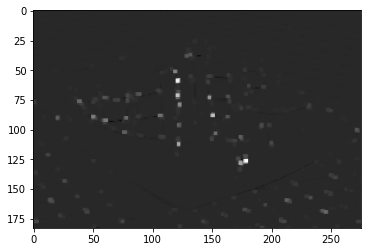

In [122]:
dst=cv2.cornerHarris(gray,2,3,0.04)
dst=cv2.dilate(dst,None)
plt.imshow(dst,cmap="gray")

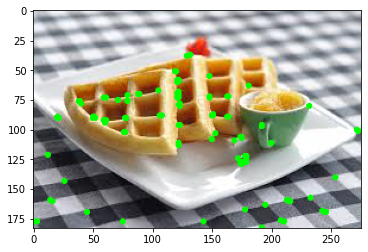

In [125]:
thresh = 0.1*dst.max()

corner_image = np.copy(image_copy)

for j in range(0, dst.shape[0]):
    for i in range(0, dst.shape[1]):
        if(dst[j,i] > thresh):
            # image, center pt, radius, color, thickness
            cv2.circle( corner_image, (i, j), 1, (0,255,0), 1)

plt.imshow(corner_image)

## Contour Detection

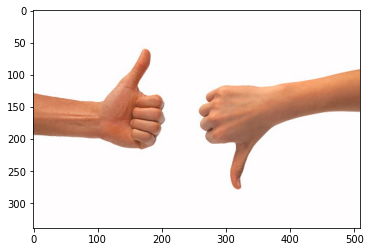

In [142]:
image=cv2.imread("thumbs_up_down.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image_copy=np.copy(image)
plt.imshow(image_copy)

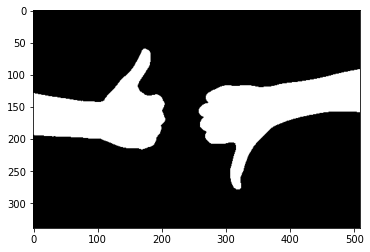

In [143]:
gray=cv2.cvtColor(image_copy,cv2.COLOR_RGB2GRAY)
retval,binary=cv2.threshold(gray,225,255,cv2.THRESH_BINARY_INV)
plt.imshow(binary,cmap="gray")

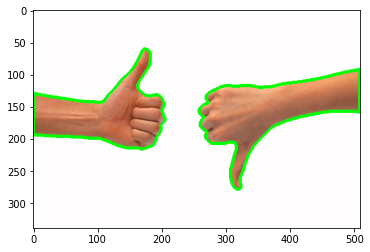

In [145]:
# Find contours from thresholded, binary image
contours, hierarchy = cv2.findContours(binary, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# Draw all contours on a copy of the original image
contours_image = np.copy(image)
contours_image = cv2.drawContours(contours_image, contours, -1, (0,255,0), 3)

plt.imshow(contours_image)

In [ ]:
(x,y), (MA,ma), angle = cv2.fitEllipse(selected_contour)

In [146]:
def orientations(contours):
    """
    Orientation 
    :param contours: a list of contours
    :return: angles, the orientations of the contours
    """
    angles = []
    
    for cnt in contours:
        # Fit an ellipse to a contour and extract the angle from that ellipse
        (x,y), (MA,ma), angle = cv2.fitEllipse(cnt)
        angles.append(angle)
        
    return angles

angles = orientations(contours)
print('Angles of each contour (in degrees): ' + str(angles))

Angles of each contour (in degrees): [61.35833740234375, 82.27550506591797]


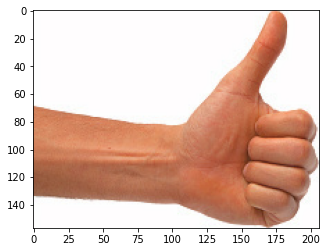

In [147]:
def left_hand_crop(image, selected_contour):
    """
    Left hand crop 
    :param image: the original image
    :param selectec_contour: the contour that will be used for cropping
    :return: cropped_image, the cropped image around the left hand
    """
    
    cropped_image = np.copy(image)
    
    x,y,w,h = cv2.boundingRect(selected_contour)
    
    cropped_image = cropped_image[y: y + h, x: x + w]
    
    return cropped_image

selected_contour = contours[1]

if(selected_contour is not None):
    # Call the crop function with that contour passed in as a parameter
    cropped_image = left_hand_crop(image, selected_contour)
    plt.imshow(cropped_image)

## Image Pyramids

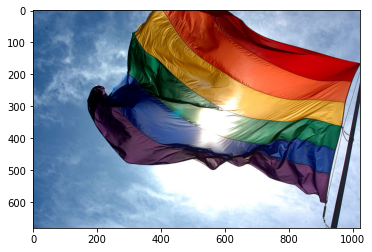

In [148]:
image=mpimg.imread("rainbow_flag.jpg")
plt.imshow(image)

(681.0, 0.0)

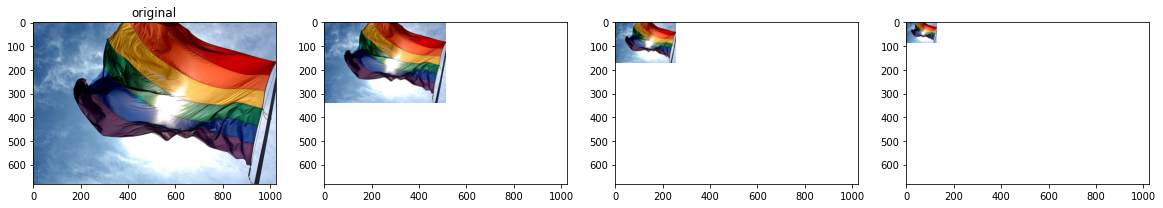

In [149]:
level_1=cv2.pyrDown(image)
level_2=cv2.pyrDown(level_1)
level_3=cv2.pyrDown(level_2)

f, (ax1,ax2,ax3,ax4) = plt.subplots(1, 4, figsize=(20,10))

ax1.set_title('original')
ax1.imshow(image)

ax2.imshow(level_1)
ax2.set_xlim([0, image.shape[1]])
ax2.set_ylim([image.shape[0], 0])

ax3.imshow(level_2)
ax3.set_xlim([0, image.shape[1]])
ax3.set_ylim([image.shape[0], 0])

ax4.imshow(level_3)
ax4.set_xlim([0, image.shape[1]])
ax4.set_ylim([image.shape[0], 0])


## Oriented FAST and Rotated BRIEF (ORB) 
#### Best suited for constant parts eg: in face, mouth or eyes do not change much.But in person moving in pedestrain thee is huge variation in size and shape of body hence this algo is not suitable for that. This algo is good for facial recognition.

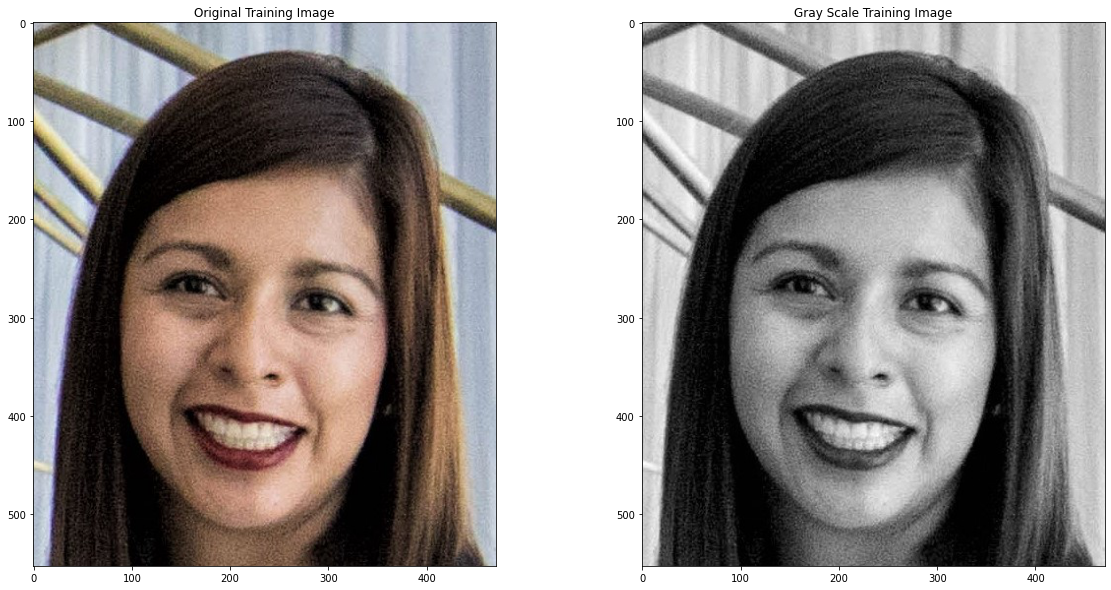

In [150]:
# Set the default figure size
plt.rcParams['figure.figsize'] = [20,10]

image = cv2.imread('face.jpeg')


training_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

training_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

plt.subplot(121)
plt.title('Original Training Image')
plt.imshow(training_image)
plt.subplot(122)
plt.title('Gray Scale Training Image')
plt.imshow(training_gray, cmap = 'gray')
plt.show()

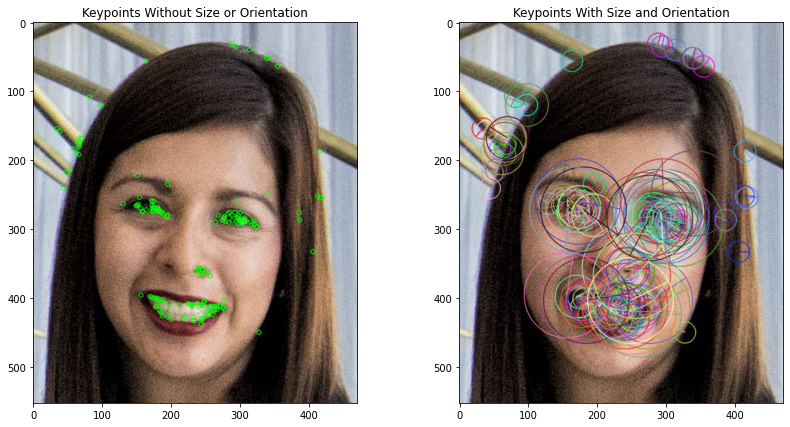


Number of keypoints Detected:  175


In [151]:
# Import copy to make copies of the training image
import copy

# Set the default figure size
plt.rcParams['figure.figsize'] = [14.0, 7.0]

# Set the parameters of the ORB algorithm by specifying the maximum number of keypoints to locate and
# the pyramid decimation ratio
orb = cv2.ORB_create(200, 2.0)

# Find the keypoints in the gray scale training image and compute their ORB descriptor.
# The None parameter is needed to indicate that we are not using a mask.
keypoints, descriptor = orb.detectAndCompute(training_gray, None)

# Create copies of the training image to draw our keypoints on
keyp_without_size = copy.copy(training_image)
keyp_with_size = copy.copy(training_image)

# Draw the keypoints without size or orientation on one copy of the training image 
cv2.drawKeypoints(training_image, keypoints, keyp_without_size, color = (0, 255, 0))

# Draw the keypoints with size and orientation on the other copy of the training image
cv2.drawKeypoints(training_image, keypoints, keyp_with_size, flags = cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

# Display the image with the keypoints without size or orientation
plt.subplot(121)
plt.title('Keypoints Without Size or Orientation')
plt.imshow(keyp_without_size)

# Display the image with the keypoints with size and orientation
plt.subplot(122)
plt.title('Keypoints With Size and Orientation')
plt.imshow(keyp_with_size)
plt.show()

# Print the number of keypoints detected
print("\nNumber of keypoints Detected: ", len(keypoints))

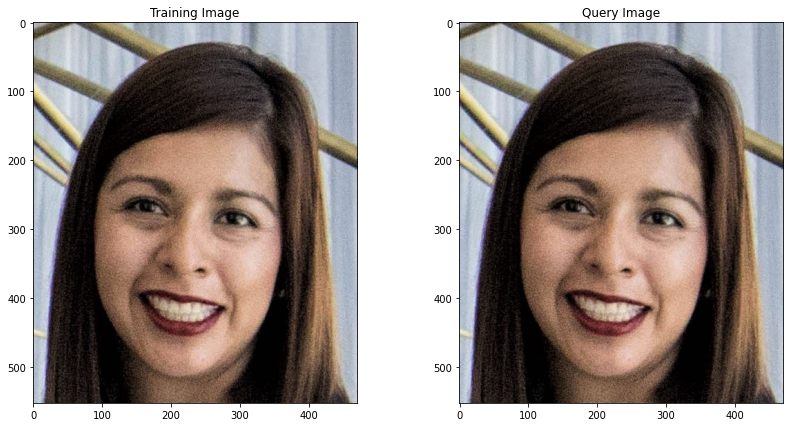

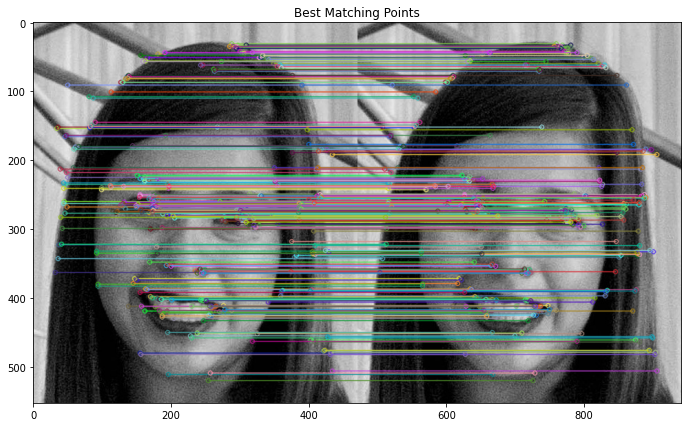

Number of Keypoints Detected In The Training Image:  822
Number of Keypoints Detected In The Query Image:  822

Number of Matching Keypoints Between The Training and Query Images:  822


In [154]:
import cv2
import matplotlib.pyplot as plt

# Set the default figure size
plt.rcParams['figure.figsize'] = [14.0, 7.0]

# Load the training image
image1 = cv2.imread('face.jpeg')

# Load the query image
image2 = cv2.imread('face.jpeg')

# Convert the training image to RGB
training_image = cv2.cvtColor(image1, cv2.COLOR_BGR2RGB)

# Convert the query image to RGB
query_image = cv2.cvtColor(image2, cv2.COLOR_BGR2RGB)

# Display the training and query images
plt.subplot(121)
plt.title('Training Image')
plt.imshow(training_image)
plt.subplot(122)
plt.title('Query Image')
plt.imshow(query_image)
plt.show()

# Convert the training image to gray scale
training_gray = cv2.cvtColor(training_image, cv2.COLOR_BGR2GRAY)

# Convert the query image to gray scale
query_gray = cv2.cvtColor(query_image, cv2.COLOR_BGR2GRAY)

# Set the parameters of the ORB algorithm by specifying the maximum number of keypoints to locate and
# the pyramid decimation ratio
orb = cv2.ORB_create(1000, 2.0)

# Find the keypoints in the gray scale training and query images and compute their ORB descriptor.
# The None parameter is needed to indicate that we are not using a mask in either case.
keypoints_train, descriptors_train = orb.detectAndCompute(training_gray, None)
keypoints_query, descriptors_query = orb.detectAndCompute(query_gray, None)

# Create a Brute Force Matcher object. Set crossCheck to True so that the BFMatcher will only return consistent
# pairs. Such technique usually produces best results with minimal number of outliers when there are enough matches.
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck = True)

# Perform the matching between the ORB descriptors of the training image and the query image
matches = bf.match(descriptors_train, descriptors_query)

# The matches with shorter distance are the ones we want. So, we sort the matches according to distance
matches = sorted(matches, key = lambda x : x.distance)

# Connect the keypoints in the training image with their best matching keypoints in the query image.
# The best matches correspond to the first elements in the sorted matches list, since they are the ones
# with the shorter distance. We draw the first 300 mathces and use flags = 2 to plot the matching keypoints
# without size or orientation.
result = cv2.drawMatches(training_gray, keypoints_train, query_gray, keypoints_query, matches[:300], query_gray, flags = 2)

# Display the best matching points
plt.title('Best Matching Points')
plt.imshow(result)
plt.show()

# Print the number of keypoints detected in the training image
print("Number of Keypoints Detected In The Training Image: ", len(keypoints_train))

# Print the number of keypoints detected in the query image
print("Number of Keypoints Detected In The Query Image: ", len(keypoints_query))

# Print total number of matching points between the training and query images
print("\nNumber of Matching Keypoints Between The Training and Query Images: ", len(matches))